In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


plt.style.use('ggplot')

In [2]:
def plot_2d_function(W, B, J, title, figsize=(12, 8)):
    
    '''
    W – матрица параметров по оси x
    B – матрица параметров по оси y
    J – функция которую мы будем оптимизировать
    
    title – заголовок картинки
    '''
    
    plt.figure(figsize=figsize)
    plt.contourf(W, B, J, levels=25)
    plt.title(title)
    plt.ylabel('$b$')
    plt.xlabel('$W$');

In [3]:
def HimFunction(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def HimFunctionGradX(x, y):
    return 4 * x * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7)
    
def HimFunctionGradY(x, y):
    return 2 * (x ** 2 + y - 11) + 4 * y * ( x + y ** 2 - 7)  

In [6]:
def get_function_parameter_space(wrange=(-10, 10), brange=(-10, 10), num=100, function=HimFunction):
    
    '''Функция, которая генерирует матрицы значений для параметров'''
    
    w_grid = np.linspace(wrange[0], wrange[1], num=num)
    b_grid = np.linspace(brange[0], brange[1], num=num)

    W, B = np.meshgrid(w_grid, b_grid)
    J = function(W, B)
    
    return W, B, J

In [12]:
def plot_2d_gradient_descent(W, B, J, ws: list, bs: list, title: str, iteration_number: int,
                             figsize=(12, 18), levels=25, W_RANGE=(-5, 5), B_RANGE=(-5, 5)):

    '''
    
    W – матрица параметров по оси x
    B – матрица параметров по оси y
    J – функция, которую мы будем оптимизировать
    
    ws – список с историей координат точки по оси x
    bs – список с историей координат точки по оси y
    
    title – заголовок картинки
    
    iteration_number – номер итерации
    figsize – размер картинки
    
    levels – количество линий уровня для отображения
    
    '''
    
    clear_output(True)
    fig, ax = plt.subplots(figsize=(12, 8))
    
    fig.set_figheight(figsize[0])
    fig.set_figwidth(figsize[1])

    cs = ax.contourf(W, B, J, levels=levels)
    ax.plot(ws, bs, 'r')

    iteration_msg = f'iteration: {iteration_number}' 
    parameters_msg = f'b: {round(bs[-1], 1)}, w: {round(ws[-1], 1)}'
    
    x_text_loc = W_RANGE[0] + (W_RANGE[1] - W_RANGE[0]) / 10
    y_text_loc = B_RANGE[0] + (B_RANGE[1] - B_RANGE[0]) / 2
    
    plt.text(
        s=iteration_msg + '\n' + parameters_msg,
        c='w', x=x_text_loc, y=y_text_loc
    )
    plt.title(title)
    plt.ylabel('$b$')
    plt.xlabel('$W$')
    
    plt.show()

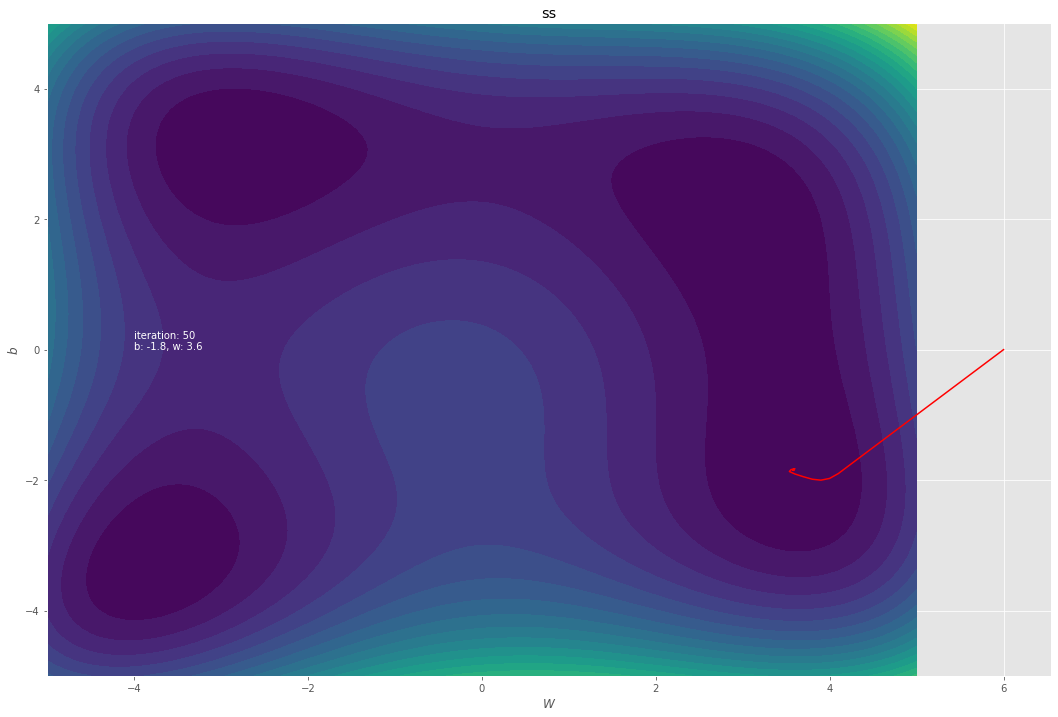

3.584432412722792 -1.8481248562168406


In [17]:
X_RANGE = (-5, 5)
Y_RANGE = (-5, 5)

X, Y, J = get_function_parameter_space(wrange=X_RANGE, brange=Y_RANGE, function=HimFunction)
title_f_2d = 'ss'

x, y = 6., 0.

xs = [x]
ys = [y]

iteration_number = 0
alpha = 0.02
tol = 1e-4

dJdx, dJdy = np.inf, np.inf

# Add pulse
v_x, v_y = 0, 0
beta = 0.5

while iteration_number < 50 and np.linalg.norm([dJdx, dJdy]) > tol:
    
    dJdx = np.clip(HimFunctionGradX(x, y), -5, 5)
    dJdy = np.clip(HimFunctionGradY(x, y), -5, 5)
    
    v_x = v_x * beta + dJdx * (1 - beta)
    x = x - alpha * v_x
    
    v_y = v_y * beta + dJdy * (1 - beta)
    y = y - alpha * v_y
    
    iteration_number += 1
    
    plot_2d_gradient_descent(X, Y, J, xs, ys, title=title_f_2d, iteration_number=iteration_number)
    
    xs.append(x)
    ys.append(y)
    
print(xs[-1], ys[-1])